In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf
from keras.datasets import mnist


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
 
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history =model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/5
938/938 [==============================] - 28s 29ms/step - loss: 0.1735 - accuracy: 0.9475 - val_loss: 0.0483 - val_accuracy: 0.9853
Epoch 2/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.0348 - val_accuracy: 0.9896
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0308 - val_accuracy: 0.9912
Epoch 4/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0271 - val_accuracy: 0.9909
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0325 - accuracy: 0.9881
Test accuracy: 0.988099992275238


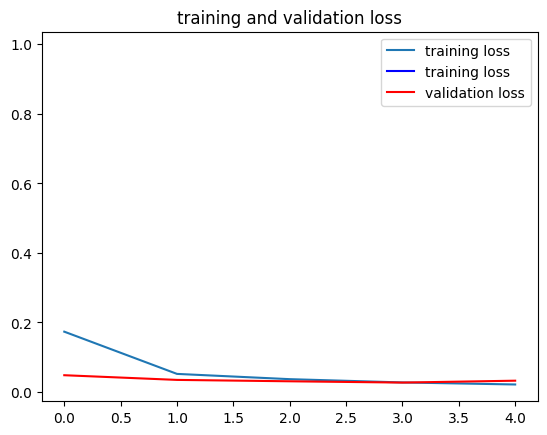

In [9]:
import matplotlib.pyplot as plt 
loss =history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(loss))
plt.figure()
plt.plot(epochs,loss,test_accuracy,'b',label='training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()